In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# sns에서 한글 보이게 설정
import matplotlib.font_manager as fm
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

# fm.get_fontconfig_fonts()
# font_location = '/project/lsh/2021bigcontest/font/MALGUN.TTF'
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'Noto Sans CJK JP'

# EDA

In [5]:
path='./data/'
음식물쓰레기 = pd.read_csv(path+'01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',encoding='CP949')
내국인 = pd.read_csv(path+'02-1_내국인유동인구_KOREAN.CSV',encoding='CP949')
장기체류 = pd.read_csv(path+'02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',encoding='CP949')
단기체류 = pd.read_csv(path+'02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV',encoding='CP949')
거주인구 = pd.read_csv(path+'03_거주인구_RESIDENT_POP.CSV',encoding='CP949')
음식카드소비 = pd.read_csv(path+'04_음식관련 카드소비_CARD_SPENDING.CSV',encoding='CP949') 

## 동별 음식물쓰레기 배출량

Text(0.5, 1.0, '동별 음식물쓰레기 배출량')

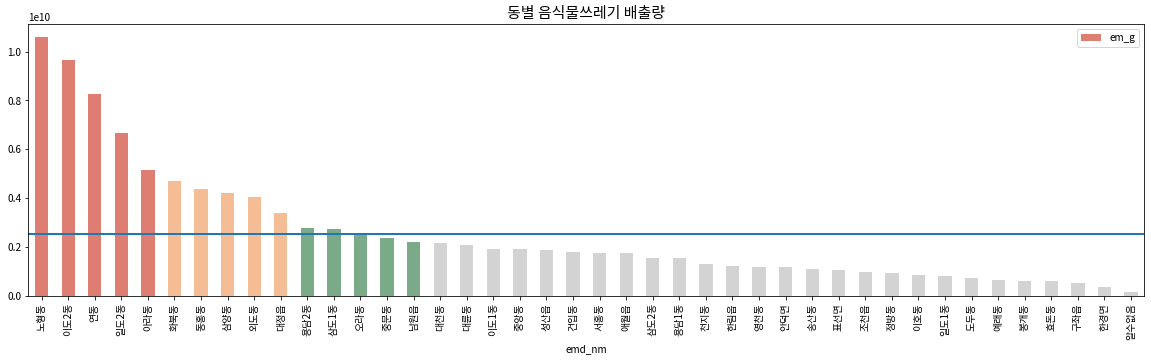

In [6]:
배출량sum = 음식물쓰레기.groupby(['emd_nm'])['em_g'].sum().reset_index()
배출량sum = 배출량sum.sort_values(by='em_g',ascending=False)
배출량평균 = 배출량sum['em_g'].mean()
color_list = ['#DE7E73']*5+['#f4bd95']*5+['#7aaa88']*5+['lightgrey']*27

c=배출량sum.plot(kind='bar', x='emd_nm', y='em_g', color=color_list,figsize=(20,5))
_=plt.axhline(배출량평균, 0, 1, linewidth=2)
c.set_title("동별 음식물쓰레기 배출량", size=15)

In [7]:
# 전체 배출량 중 비율

제주총배출량=배출량sum['em_g'].sum()
배출량sum['배출량rate']=(배출량sum['em_g']/제주총배출량)*100

배출량sum.head(5)['배출량rate'].sum()
배출량sum.head(10)['배출량rate'].sum()
배출량sum.head(15)['배출량rate'].sum()

38.01089128506807

57.54107914342917

69.39044966162083

## 내국인 유동인구

<Figure size 4000x1000 with 0 Axes>

Text(0.5, 1.0, '내국인_거주_유동인구 평균')

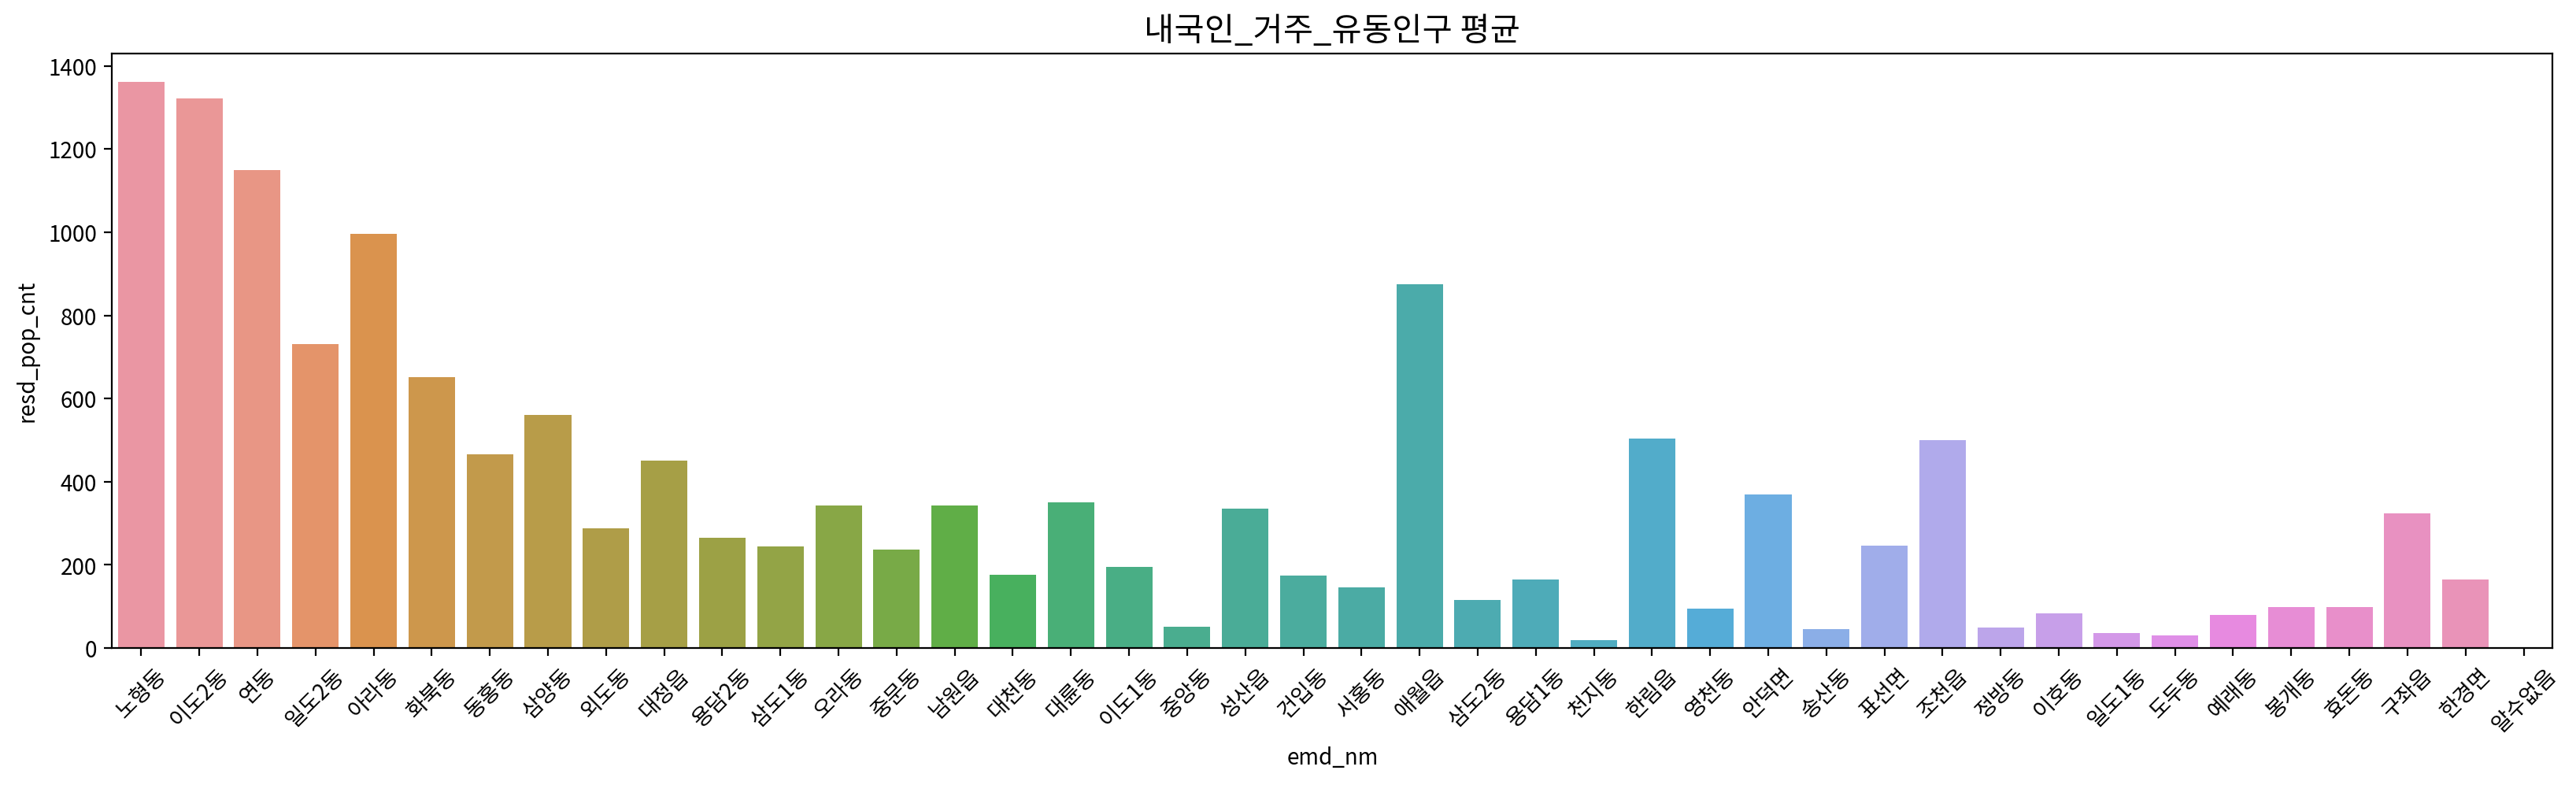

In [8]:
거주mean = 내국인.groupby(['emd_nm'])['resd_pop_cnt'].mean().reset_index()
거주mean = 거주mean.sort_values(by='resd_pop_cnt',ascending=False)
배출량order = 배출량sum['emd_nm'].unique()

plt.figure(figsize=(20,5),dpi=200)
c=sns.barplot(data=거주mean, x='emd_nm', y='resd_pop_cnt', order=배출량order)
_=plt.xticks(rotation=45)
c.set_title("내국인_거주_유동인구 평균", size=15)

<Figure size 4000x1000 with 0 Axes>

Text(0.5, 1.0, '내국인_근무_유동인구 평균')

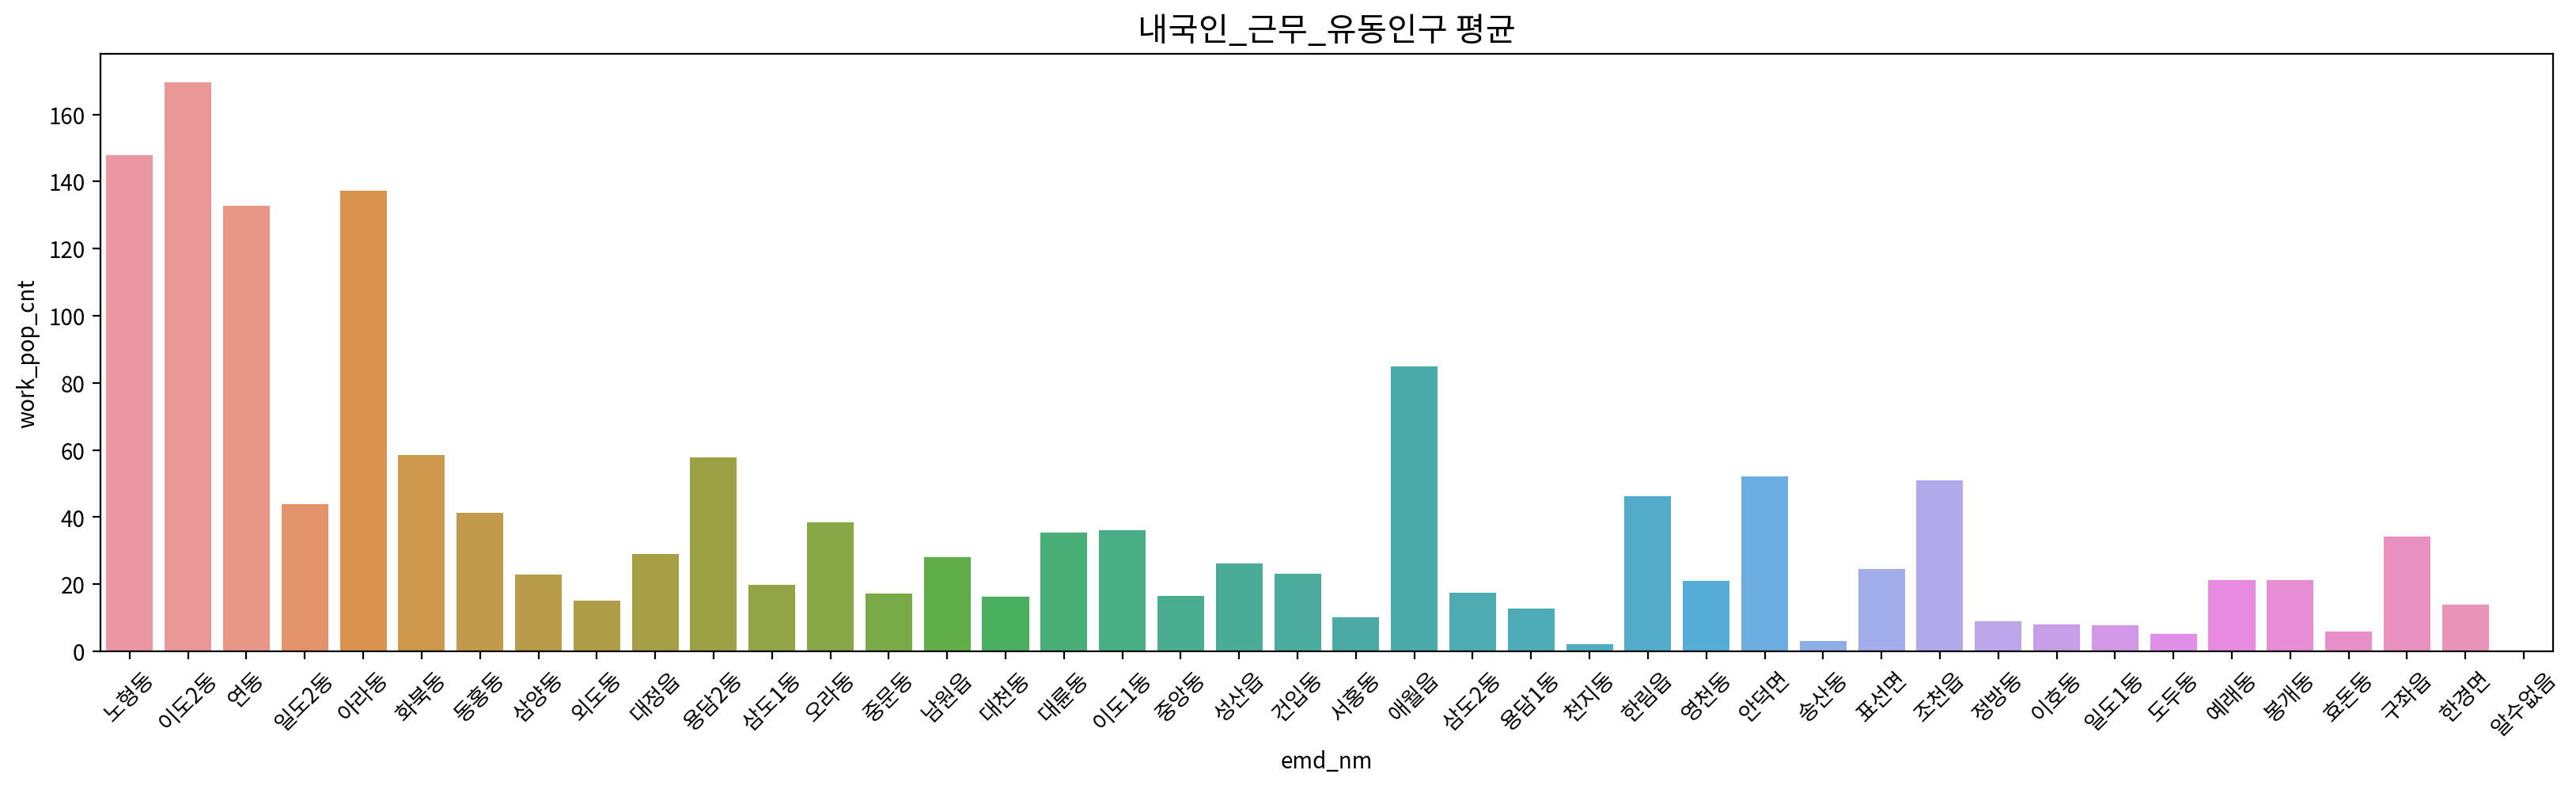

In [9]:
근무mean = 내국인.groupby(['emd_nm'])['work_pop_cnt'].mean().reset_index()
근무mean = 근무mean.sort_values(by='work_pop_cnt',ascending=False)

plt.figure(figsize=(20,5),dpi=200)
c=sns.barplot(data=근무mean, x='emd_nm', y='work_pop_cnt', order=배출량order)
_=plt.xticks(rotation=45)
c.set_title("내국인_근무_유동인구 평균", size=15)

<Figure size 4000x1000 with 0 Axes>

Text(0.5, 1.0, '내국인_방문_유동인구 평균')

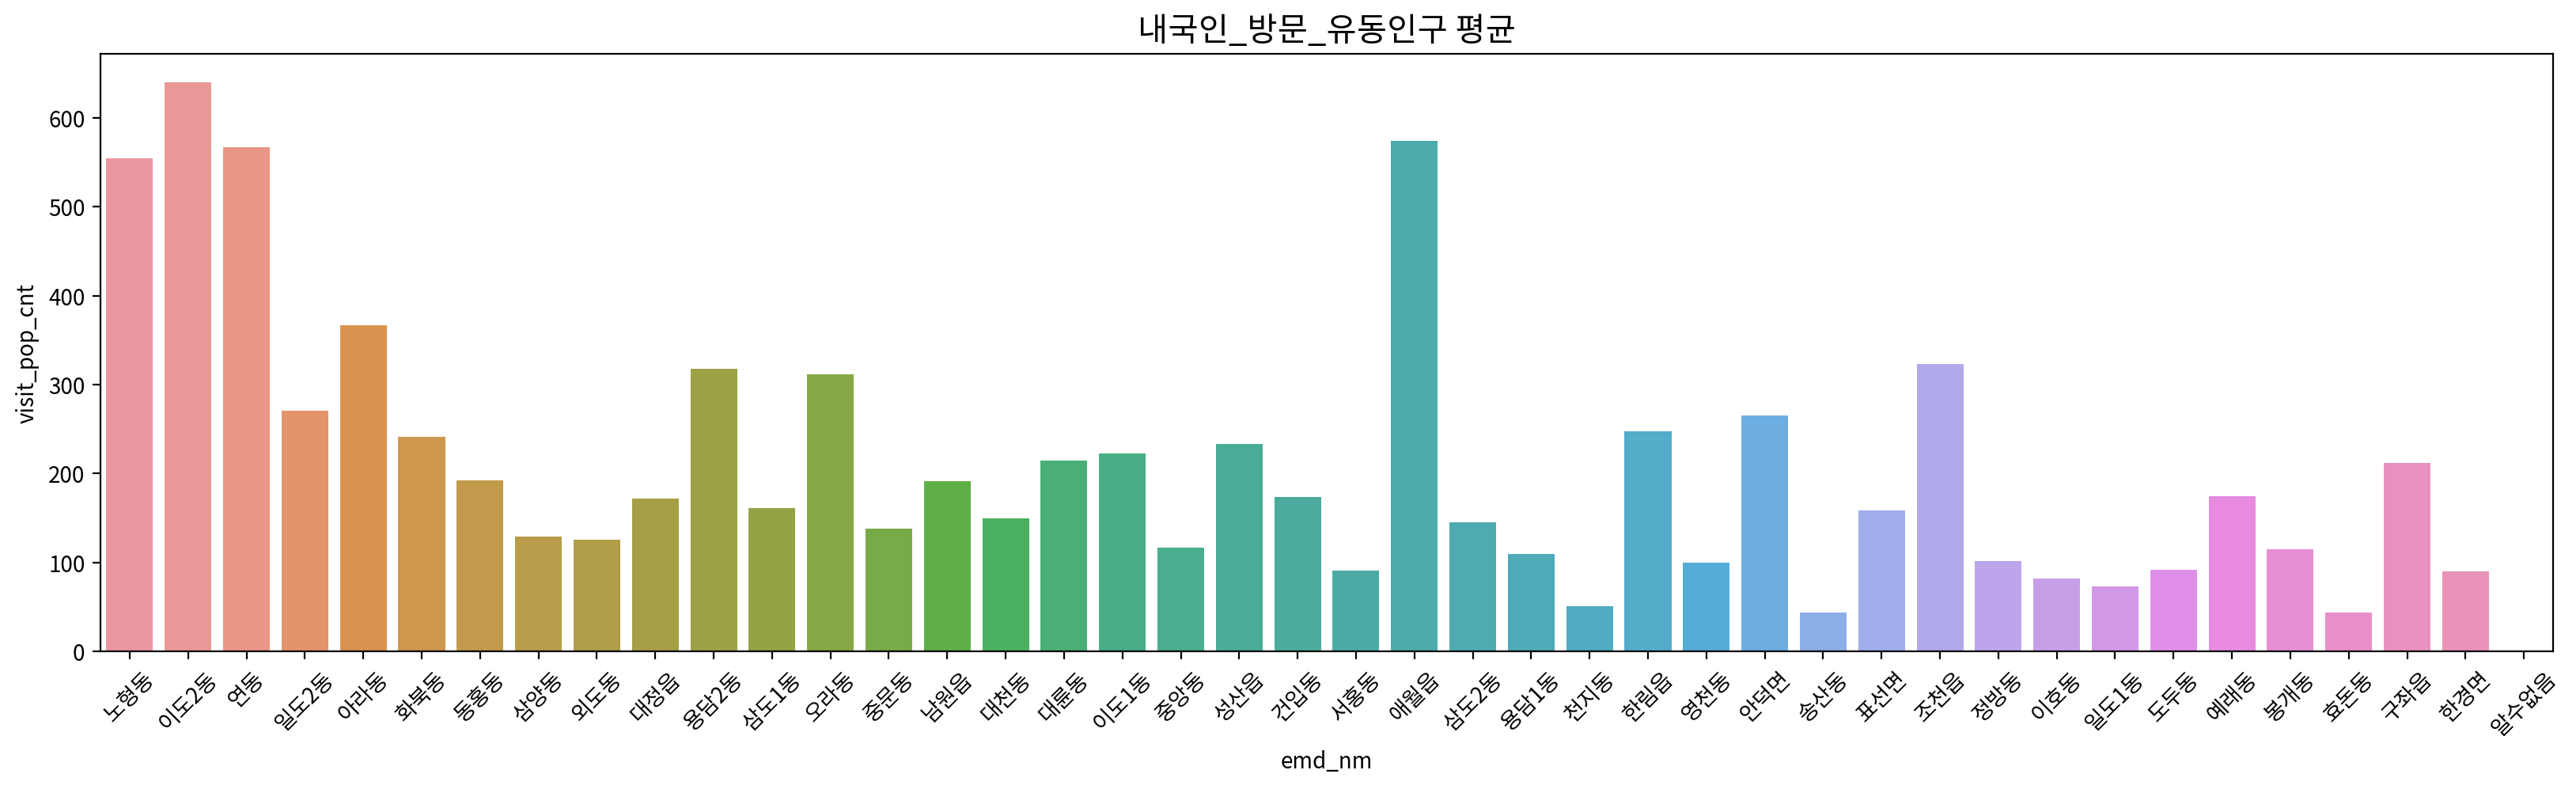

In [10]:
방문mean = 내국인.groupby(['emd_nm'])['visit_pop_cnt'].mean().reset_index()
방문mean = 방문mean.sort_values(by='visit_pop_cnt',ascending=False)

plt.figure(figsize=(20,5),dpi=200)
c=sns.barplot(data=방문mean, x='emd_nm', y='visit_pop_cnt', order=배출량order)
_=plt.xticks(rotation=45)
c.set_title("내국인_방문_유동인구 평균", size=15)

In [11]:
import datetime 
내국인['base_date']= pd.to_datetime(내국인['base_date']) 
내국인['year'] = 내국인['base_date'].dt.year 
내국인['month'] = 내국인['base_date'].dt.month
내국인['일'] = 내국인['base_date'].dt.day

내국인 = 내국인.groupby(['year'])['visit_pop_cnt','resd_pop_cnt','work_pop_cnt'].sum().reset_index()
내국인 

,year,visit_pop_cnt,resd_pop_cnt,work_pop_cnt
0,2018,2.765982e+09,4.428362e+09,5.164793e+08
1,2019,2.813975e+09,4.474772e+09,5.198259e+08
2,2020,2.588541e+09,4.829459e+09,4.620125e+08
3,2021,1.356278e+09,2.599406e+09,2.320741e+08


In [12]:
((내국인['visit_pop_cnt'][1]-내국인['visit_pop_cnt'][2])/내국인['visit_pop_cnt'][2])*100

8.708915342857061

## 배달 / 마트 관련 카드 소비

### 배달

In [13]:
배달 = 음식카드소비[음식카드소비['mct_cat_nm']=='배달']
배달

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
122370,2018-12-16,제주시,50110650,연동,C01400,배달,448,9832292
122371,2020-01-31,제주시,50110650,연동,C01400,배달,933,20519743
122372,2019-10-06,제주시,50110650,연동,C01400,배달,734,16651653
122373,2019-10-21,제주시,50110650,연동,C01400,배달,571,11292726
122374,2019-10-01,제주시,50110650,연동,C01400,배달,724,16066632
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


<Figure size 4000x1000 with 0 Axes>

Text(0.5, 1.0, '동별 배달건수 평균')

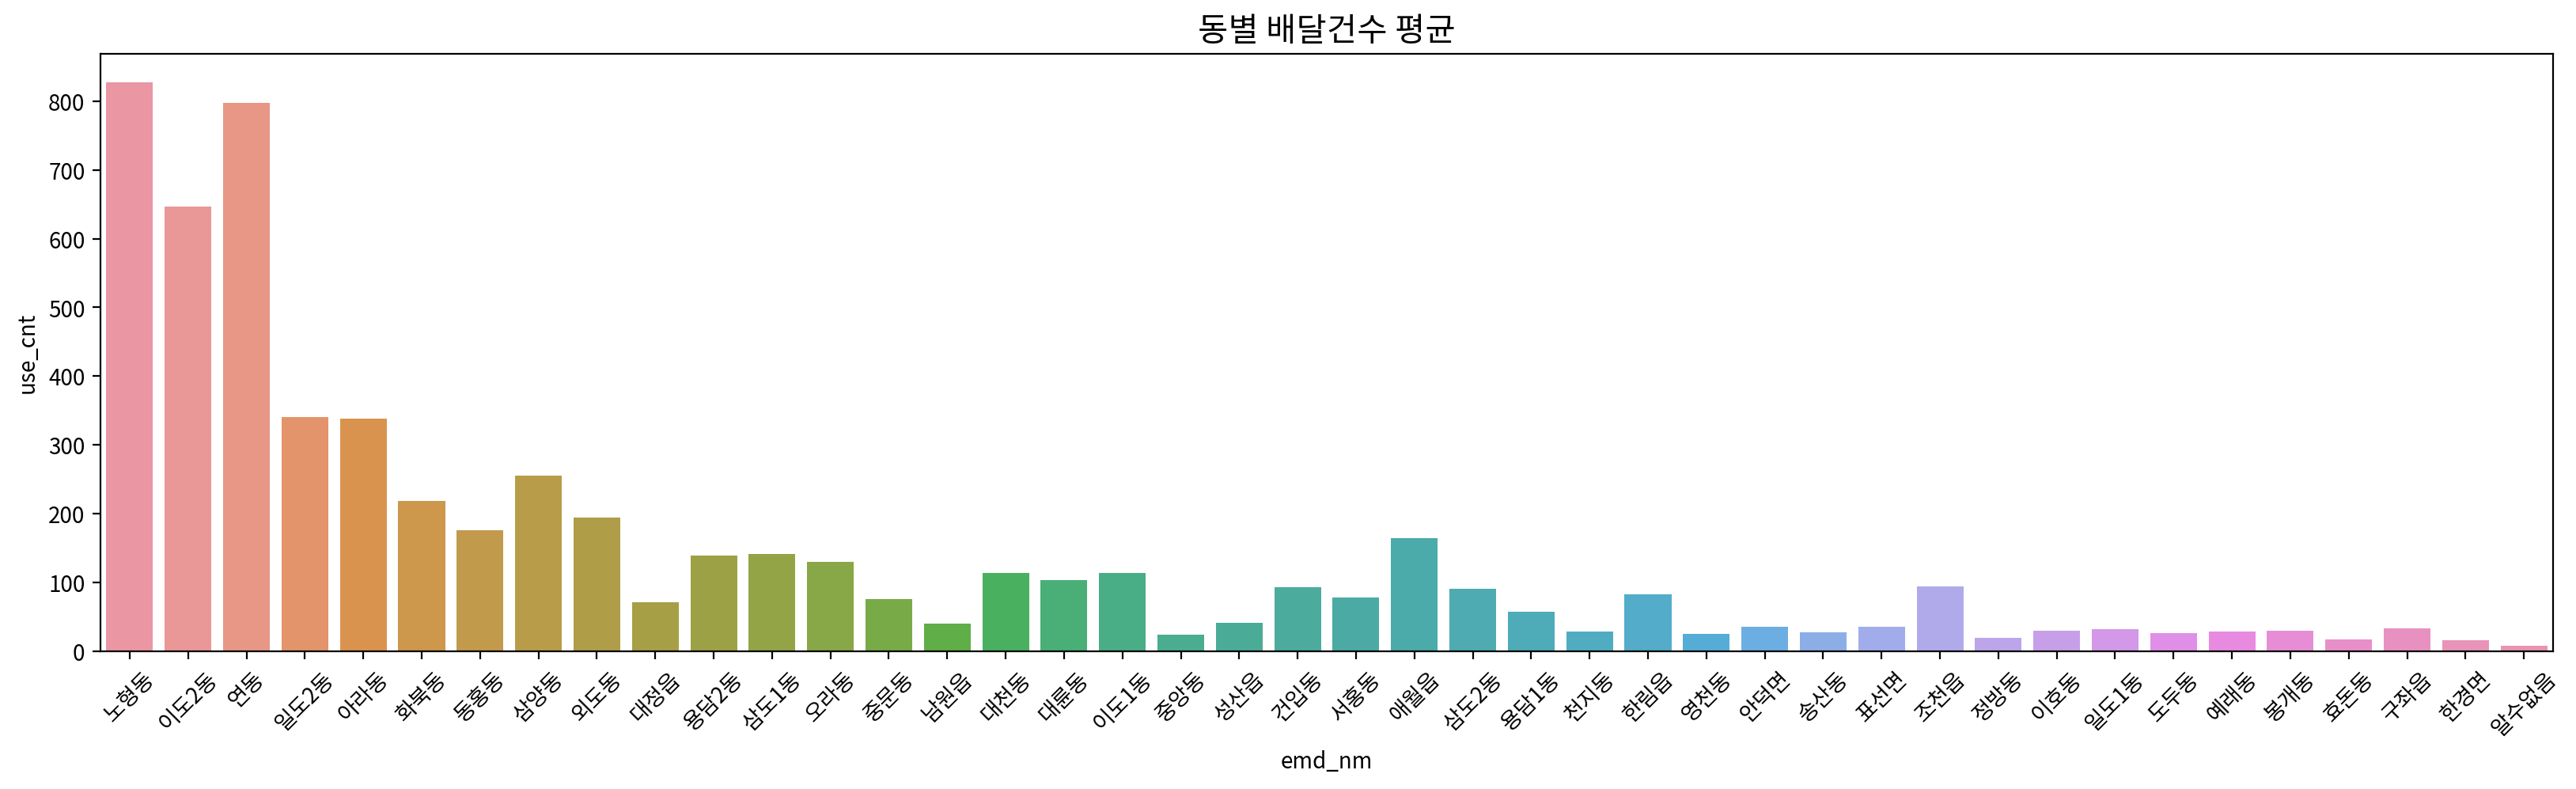

In [14]:
배달_cnt = 배달.groupby(['emd_nm'])['use_cnt'].mean().reset_index()
배달_cnt = 배달_cnt.sort_values(by='use_cnt',ascending=False)

plt.figure(figsize=(20,5),dpi=200)
c=sns.barplot(data=배달_cnt, x='emd_nm', y='use_cnt', order=배출량order)
_=plt.xticks(rotation=45)
c.set_title("동별 배달건수 평균", size=15)

### 마트, 슈퍼마켓

In [15]:
마트 = 음식카드소비[음식카드소비['mct_cat_nm']=='마트/슈퍼마켓']
마트

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
14,2018-02-06,제주시,50110650,연동,A00200,마트/슈퍼마켓,3364,99018979
34,2018-04-20,제주시,50110650,연동,A00200,마트/슈퍼마켓,3532,94000829
43,2018-05-11,제주시,50110650,연동,A00200,마트/슈퍼마켓,3153,81716456
49,2018-05-19,제주시,50110650,연동,A00200,마트/슈퍼마켓,3901,133939526
...,...,...,...,...,...,...,...,...
533875,2020-02-22,서귀포시,XXXXXXXX,알수없음,A00200,마트/슈퍼마켓,35,1524848
533886,2021-03-02,서귀포시,XXXXXXXX,알수없음,A00200,마트/슈퍼마켓,31,1042178
533901,2020-07-21,서귀포시,XXXXXXXX,알수없음,A00200,마트/슈퍼마켓,20,714941
533903,2021-06-26,서귀포시,XXXXXXXX,알수없음,A00200,마트/슈퍼마켓,10,251399


<Figure size 4000x1000 with 0 Axes>

Text(0.5, 1.0, '동별 마트 결제 평균 건수')

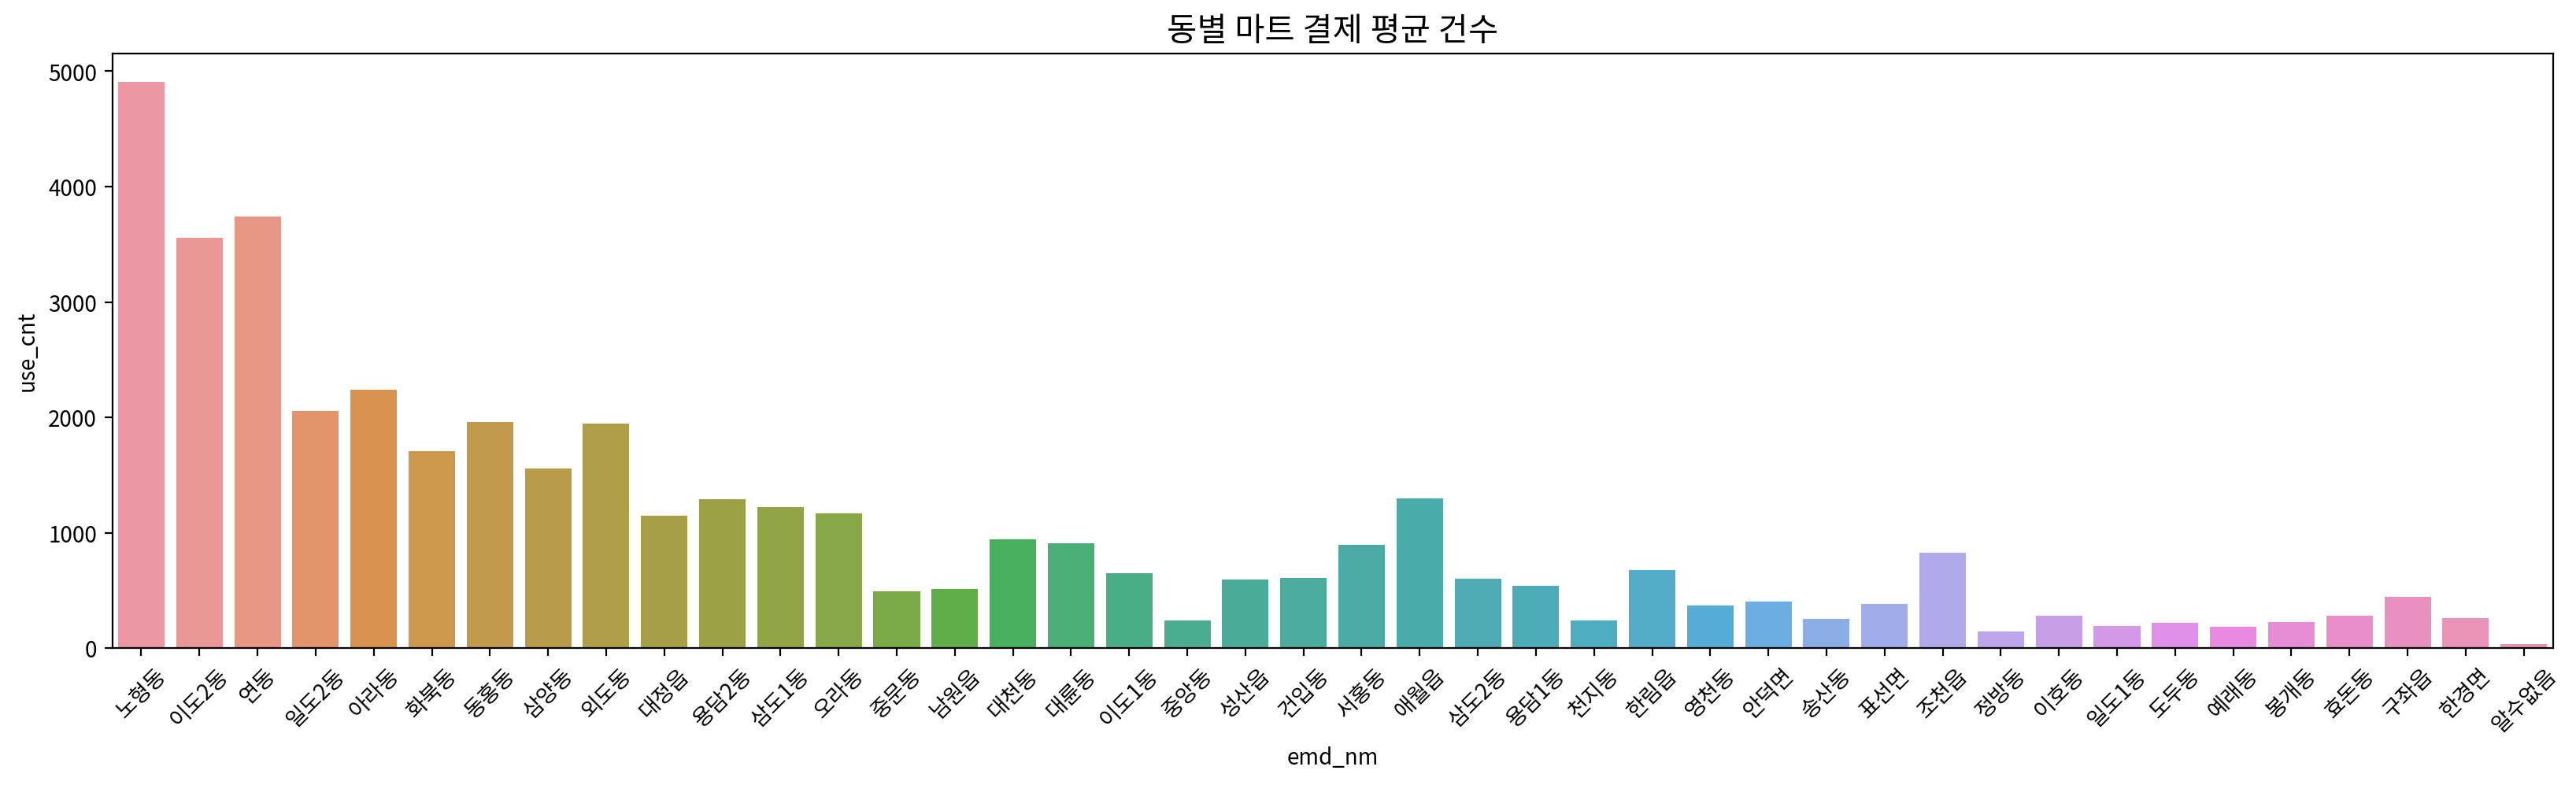

In [16]:
마트_cnt = 마트.groupby(['emd_nm'])['use_cnt'].mean().reset_index()
마트_cnt = 마트_cnt.sort_values(by='use_cnt',ascending=False)

plt.figure(figsize=(20,5),dpi=200)
c=sns.barplot(data=마트_cnt, x='emd_nm', y='use_cnt', order=배출량order)
_=plt.xticks(rotation=45)
c.set_title("동별 마트 결제 평균 건수", size=15)

## 외국인 단기체류

In [17]:
import datetime 
단기체류['base_date']= pd.to_datetime(단기체류['base_date']) 
단기체류['year'] = 단기체류['base_date'].dt.year 
단기체류['month'] = 단기체류['base_date'].dt.month
단기체류['일'] = 단기체류['base_date'].dt.day

단기체류 = 단기체류.groupby(['year'])['visit_pop_cnt'].sum().reset_index()
단기체류 

,year,visit_pop_cnt
0,2018,7.541730e+07
1,2019,1.035572e+08
2,2020,1.199436e+07
3,2021,5.987402e+05


In [18]:
((단기체류['visit_pop_cnt'][1]-단기체류['visit_pop_cnt'][2])/단기체류['visit_pop_cnt'][2])*100

763.3828816934681

# 전처리

In [21]:
path='./data/'
음식물쓰레기 = pd.read_csv(path+'01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',encoding='CP949')
내국인 = pd.read_csv(path+'02-1_내국인유동인구_KOREAN.CSV',encoding='CP949')
장기체류 = pd.read_csv(path+'02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',encoding='CP949')
단기체류 = pd.read_csv(path+'02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV',encoding='CP949')
거주인구 = pd.read_csv(path+'03_거주인구_RESIDENT_POP.CSV',encoding='CP949')
음식카드소비 = pd.read_csv(path+'04_음식관련 카드소비_CARD_SPENDING.CSV',encoding='CP949') 

In [22]:
import datetime as dt
def convert_time(x):
    x = pd.to_datetime(x)
    return x
음식물쓰레기['base_date'] = pd.to_datetime(음식물쓰레기['base_date'])
내국인['base_date'] = convert_time(내국인['base_date'])
장기체류['base_date']=convert_time(장기체류['base_date'])
단기체류['base_date']=convert_time(단기체류['base_date'])
음식카드소비['base_date']=convert_time(음식카드소비['base_date'])

음식물쓰레기['year'] = 음식물쓰레기['base_date'].dt.year
음식물쓰레기['month'] = 음식물쓰레기['base_date'].dt.month
음식물쓰레기['day'] = 음식물쓰레기['base_date'].dt.day
내국인['year'] = 내국인['base_date'].dt.year
내국인['month'] = 내국인['base_date'].dt.month
장기체류['year'] = 장기체류['base_date'].dt.year
장기체류['month'] = 장기체류['base_date'].dt.month
단기체류['year'] = 단기체류['base_date'].dt.year
단기체류['month'] = 단기체류['base_date'].dt.month
음식카드소비['year'] = 음식카드소비['base_date'].dt.year
음식카드소비['month'] = 음식카드소비['base_date'].dt.month

def f1(i):
    if i>=3 and i<=5:
        return 0
    if i>=6 and i<=8:
        return 1
    if i>=9 and i<=11:
        return 2
    else:
        return 3

In [23]:
date = pd.DataFrame(음식물쓰레기.groupby(['year', 'month','emd_nm'])['base_date'].max()).reset_index()
fw = pd.DataFrame(음식물쓰레기.groupby(['year', 'month','emd_nm'])['em_g'].sum()).reset_index()
fw = pd.merge(date,fw,how='right',on=['year', 'month','emd_nm'])
fw = fw[['base_date','year','month','emd_nm','em_g']]

In [24]:
내국 = pd.DataFrame(내국인.groupby(['year', 'month','emd_nm'])['resd_pop_cnt', 'work_pop_cnt','visit_pop_cnt'].mean()).reset_index()
내국 = 내국.rename(columns={'resd_pop_cnt':'내국resd','work_pop_cnt':'내국work','visit_pop_cnt':'내국visit'})
a = pd.merge(내국,fw,how='right',on=list(내국.columns.intersection(fw.columns)))

장기 = pd.DataFrame(장기체류.groupby(['year', 'month','emd_nm'])['resd_pop_cnt', 'work_pop_cnt','visit_pop_cnt'].mean()).reset_index()
장기 = 장기.rename(columns={'resd_pop_cnt':'long_resd','work_pop_cnt':'long_work','visit_pop_cnt':'long_visit'})
aa = pd.merge(a,장기,how='left',on=list(a.columns.intersection(장기.columns)))

단기 = pd.DataFrame(단기체류.groupby(['year', 'month','emd_nm'])['visit_pop_cnt'].mean()).reset_index()
단기 = 단기.rename(columns={'visit_pop_cnt':'short_visit_pop_cnt'})
aaa = pd.merge(aa,단기,how='left',on=list(aa.columns.intersection(단기.columns)))

거주인구 = 거주인구.rename(columns={'base_year':'year','base_month':'month'})
거주 = pd.DataFrame(거주인구.groupby(['year', 'month','emd_nm'])['resid_reg_pop','foreign_pop','total_pop'].mean()).reset_index()
거주 = 거주.rename(columns={'resid_reg_pop':'거주resid','foreign_pop':'거주foreign','total_pop':'거주total'})
aaaa = pd.merge(aaa,거주,how='left',on=list(aaa.columns.intersection(거주.columns)))

aaaa.head()

,year,month,emd_nm,내국resd,내국work,내국visit,base_date,em_g,long_resd,long_work,long_visit,short_visit_pop_cnt,거주resid,거주foreign,거주total
0,2018,1,건입동,184.688430,26.338970,184.797464,2018-01-31,45646550,8.583848,1.428658,9.718961,18.040378,4900.0,114.0,5014.0
1,2018,1,남원읍,322.890994,25.852855,207.400936,2018-01-31,42437700,15.207991,2.274018,11.477026,55.173826,9556.0,314.0,9870.0
2,2018,1,노형동,1355.519211,134.120645,570.110673,2018-01-31,265018400,68.001225,5.834689,20.299049,43.686064,26684.5,794.5,27479.0
3,2018,1,대륜동,308.924735,30.260918,246.424702,2018-01-31,57612600,7.739642,0.731385,9.043291,13.634790,6736.5,89.0,6825.5
4,2018,1,대정읍,425.050396,23.451247,161.436848,2018-01-31,38885550,38.312134,1.152061,12.246969,11.509036,10542.5,759.0,11301.5


In [25]:
공휴일 = pd.read_csv('/project/kelly/국가공휴일.csv')#, encoding = 'cp949')
공cnt = pd.DataFrame(공휴일.groupby(['년', '월'])['월'].count())
공cnt.columns = ['cnt']
공cnt.reset_index(inplace = True)
공cnt_re = 공cnt.rename(columns = {'년':'year', '월':'month'})
# 공cnt_re

df = pd.merge(aaaa,공cnt_re,how='left',on=['year','month'])
df = df.rename(columns={'cnt':'holiday_cnt'})
df = df.drop('base_date',axis=1)

In [26]:
df

,year,month,emd_nm,내국resd,내국work,내국visit,em_g,long_resd,long_work,long_visit,short_visit_pop_cnt,거주resid,거주foreign,거주total,holiday_cnt
0,2018,1,건입동,184.688430,26.338970,184.797464,45646550,8.583848,1.428658,9.718961,18.040378,4900.0,114.0,5014.0,1.0
1,2018,1,남원읍,322.890994,25.852855,207.400936,42437700,15.207991,2.274018,11.477026,55.173826,9556.0,314.0,9870.0,1.0
2,2018,1,노형동,1355.519211,134.120645,570.110673,265018400,68.001225,5.834689,20.299049,43.686064,26684.5,794.5,27479.0,1.0
3,2018,1,대륜동,308.924735,30.260918,246.424702,57612600,7.739642,0.731385,9.043291,13.634790,6736.5,89.0,6825.5,1.0
4,2018,1,대정읍,425.050396,23.451247,161.436848,38885550,38.312134,1.152061,12.246969,11.509036,10542.5,759.0,11301.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2021,6,표선면,286.991466,25.092482,174.327940,42453750,6.814822,0.617809,5.177288,0.985845,6173.5,167.0,6340.5,1.0
1662,2021,6,한경면,198.737972,17.291361,114.363921,27060150,11.175519,0.463497,11.857395,0.481637,4579.0,168.5,4747.5,1.0
1663,2021,6,한림읍,555.996633,52.173207,304.743038,82746990,31.396603,1.979438,15.341988,0.894318,10616.0,1615.0,12231.0,1.0
1664,2021,6,화북동,689.008123,50.717815,252.226872,110750050,12.319517,1.504161,3.613323,0.408654,12150.0,165.0,12315.0,1.0


In [27]:
카드소비 = 음식카드소비.drop(columns=['city','emd_cd','mct_cat_cd'])
배달 = 카드소비[카드소비['mct_cat_nm']=='배달']

import datetime 
배달['base_date']= pd.to_datetime(배달['base_date']) 
배달['year'] = 배달['base_date'].dt.year 
배달['month'] = 배달['base_date'].dt.month
배달['일'] = 배달['base_date'].dt.day

배달 = 배달.groupby(['emd_nm','year','month'])['use_cnt'].mean().reset_index()

df = pd.merge(df, 배달, how='left', on=['emd_nm','year','month'])
df = df.rename(columns={'use_cnt':'배달_cnt'})


마트 = 카드소비[카드소비['mct_cat_nm']=='마트/슈퍼마켓']
마트 = 카드소비[카드소비['mct_cat_nm']=='마트/슈퍼마켓']

import datetime 
마트['base_date']= pd.to_datetime(마트['base_date']) 
마트['year'] = 마트['base_date'].dt.year 
마트['month'] = 마트['base_date'].dt.month
마트['일'] = 마트['base_date'].dt.day

마트 = 마트.groupby(['emd_nm','year','month'])['use_cnt'].mean().reset_index()

df = pd.merge(df, 마트, how='left', on=['emd_nm','year','month'])
df = df.rename(columns={'use_cnt':'마트_cnt'})
df

,year,month,emd_nm,내국resd,내국work,내국visit,em_g,long_resd,long_work,long_visit,short_visit_pop_cnt,거주resid,거주foreign,거주total,holiday_cnt,배달_cnt,마트_cnt
0,2018,1,건입동,184.688430,26.338970,184.797464,45646550,8.583848,1.428658,9.718961,18.040378,4900.0,114.0,5014.0,1.0,19.500000,566.032258
1,2018,1,남원읍,322.890994,25.852855,207.400936,42437700,15.207991,2.274018,11.477026,55.173826,9556.0,314.0,9870.0,1.0,10.192308,444.709677
2,2018,1,노형동,1355.519211,134.120645,570.110673,265018400,68.001225,5.834689,20.299049,43.686064,26684.5,794.5,27479.0,1.0,139.677419,4733.290323
3,2018,1,대륜동,308.924735,30.260918,246.424702,57612600,7.739642,0.731385,9.043291,13.634790,6736.5,89.0,6825.5,1.0,16.896552,835.774194
4,2018,1,대정읍,425.050396,23.451247,161.436848,38885550,38.312134,1.152061,12.246969,11.509036,10542.5,759.0,11301.5,1.0,17.035714,981.709677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2021,6,표선면,286.991466,25.092482,174.327940,42453750,6.814822,0.617809,5.177288,0.985845,6173.5,167.0,6340.5,1.0,93.933333,402.533333
1662,2021,6,한경면,198.737972,17.291361,114.363921,27060150,11.175519,0.463497,11.857395,0.481637,4579.0,168.5,4747.5,1.0,36.166667,296.266667
1663,2021,6,한림읍,555.996633,52.173207,304.743038,82746990,31.396603,1.979438,15.341988,0.894318,10616.0,1615.0,12231.0,1.0,243.300000,670.966667
1664,2021,6,화북동,689.008123,50.717815,252.226872,110750050,12.319517,1.504161,3.613323,0.408654,12150.0,165.0,12315.0,1.0,679.000000,1604.766667


In [28]:
df['season'] = df['month'].apply(lambda x: f1(x))

In [29]:
df=df[['year', 'month', 'emd_nm', 'season', 'holiday_cnt', 'long_resd', 'long_work', 'long_visit',
           'short_visit_pop_cnt', '배달_cnt','마트_cnt', '내국resd', '내국work', '내국visit', '거주foreign', '거주total',
           '거주resid', 'em_g']]

In [30]:
df

,year,month,emd_nm,season,holiday_cnt,long_resd,long_work,long_visit,short_visit_pop_cnt,배달_cnt,마트_cnt,내국resd,내국work,내국visit,거주foreign,거주total,거주resid,em_g
0,2018,1,건입동,3,1.0,8.583848,1.428658,9.718961,18.040378,19.500000,566.032258,184.688430,26.338970,184.797464,114.0,5014.0,4900.0,45646550
1,2018,1,남원읍,3,1.0,15.207991,2.274018,11.477026,55.173826,10.192308,444.709677,322.890994,25.852855,207.400936,314.0,9870.0,9556.0,42437700
2,2018,1,노형동,3,1.0,68.001225,5.834689,20.299049,43.686064,139.677419,4733.290323,1355.519211,134.120645,570.110673,794.5,27479.0,26684.5,265018400
3,2018,1,대륜동,3,1.0,7.739642,0.731385,9.043291,13.634790,16.896552,835.774194,308.924735,30.260918,246.424702,89.0,6825.5,6736.5,57612600
4,2018,1,대정읍,3,1.0,38.312134,1.152061,12.246969,11.509036,17.035714,981.709677,425.050396,23.451247,161.436848,759.0,11301.5,10542.5,38885550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2021,6,표선면,1,1.0,6.814822,0.617809,5.177288,0.985845,93.933333,402.533333,286.991466,25.092482,174.327940,167.0,6340.5,6173.5,42453750
1662,2021,6,한경면,1,1.0,11.175519,0.463497,11.857395,0.481637,36.166667,296.266667,198.737972,17.291361,114.363921,168.5,4747.5,4579.0,27060150
1663,2021,6,한림읍,1,1.0,31.396603,1.979438,15.341988,0.894318,243.300000,670.966667,555.996633,52.173207,304.743038,1615.0,12231.0,10616.0,82746990
1664,2021,6,화북동,1,1.0,12.319517,1.504161,3.613323,0.408654,679.000000,1604.766667,689.008123,50.717815,252.226872,165.0,12315.0,12150.0,110750050


## '구좌읍', '조천읍', '한경면', '한림읍'

- 2018.01 ~ 2019.10 : {'구좌읍', '조천읍', '한경면', '한림읍'} 존재 X

In [31]:
set(df[829:]['emd_nm'].unique()) - set(df[:829]['emd_nm'].unique())

{'구좌읍', '조천읍', '한경면', '한림읍'}

In [32]:
dong4_name = ['구좌읍', '조천읍', '한경면', '한림읍']
dong4 = df[df['emd_nm'].isin(dong4_name)].reset_index(drop=True)
dong38 = df[~df['emd_nm'].isin(dong4_name)].reset_index(drop=True)

In [33]:
dong38.columns

Index(['year', 'month', 'emd_nm', 'season', 'holiday_cnt', 'long_resd',
       'long_work', 'long_visit', 'short_visit_pop_cnt', '배달_cnt', '마트_cnt',
       '내국resd', '내국work', '내국visit', '거주foreign', '거주total', '거주resid',
       'em_g'],
      dtype='object')

### 증감률 계산
- 2020년대비 2018, 2019년 증감률 계산

In [34]:
cols = dong38.columns[5:-1]
cols = cols[cols!='season']

per2019 = []
per2018 = []

for i in cols:
    aa = dong38.groupby(['year'])[i].sum()
    print('2019 : ',str(i), (aa[2019] - aa[2020])/aa[2020])
    per2019.append((aa[2019] - aa[2020])/aa[2020])
for i in cols:
    aa = dong38.groupby(['year'])[i].sum()    
    print('2018 : ',str(i), (aa[2018] - aa[2020])/aa[2020])
    per2018.append((aa[2018] - aa[2020])/aa[2020])

2019 :  long_resd 0.03372798559599812
2019 :  long_work 0.26585697123102303
2019 :  long_visit 0.1460102625588425
2019 :  short_visit_pop_cnt 5.893494423340893
2019 :  배달_cnt -0.5686938287093746
2019 :  마트_cnt -0.016361949772177736
2019 :  내국resd -0.06956107410046475
2019 :  내국work 0.1351438730326986
2019 :  내국visit 0.08833738575661511
2019 :  거주foreign 0.05046315315195929
2019 :  거주total -0.002076212123997444
2019 :  거주resid -0.0037346767609654887
2018 :  long_resd 0.10813663942145729
2018 :  long_work 0.38034071411388626
2018 :  long_visit -0.0968030413054116
2018 :  short_visit_pop_cnt 4.400469226119115
2018 :  배달_cnt -0.8254688350913699
2018 :  마트_cnt -0.018014201927737606
2018 :  내국resd -0.07594021488094255
2018 :  내국work 0.1336564880093737
2018 :  내국visit 0.07225844195267422
2018 :  거주foreign -0.05279548375982295
2018 :  거주total -0.013642714171553515
2018 :  거주resid -0.012406812605928437


In [35]:
df2019 = dong38[(dong38['year']==2019)&(dong38['emd_nm']=='건입동')][['year','month','season','holiday_cnt']].reset_index(drop=True)
df2018 = dong38[(dong38['year']==2018)&(dong38['emd_nm']=='건입동')][['year','month','season','holiday_cnt']].reset_index(drop=True)

def dong_mean(dong_name):
    a = dong4[dong4['emd_nm']==dong_name].reset_index(drop=True)
    b = a[(a['year']==2020)][cols].reset_index(drop=True)
    c = b+(b*per2018)
    dong18 = pd.concat([df2018,c],axis=1)
    
    aa = dong4[dong4['emd_nm']==dong_name].reset_index(drop=True)
    bb = aa[(aa['year']==2020)][cols].reset_index(drop=True)[:-2]
    cc = bb+(bb*per2019)
    dong19 = pd.concat([df2019[:-2],cc],axis=1)
    
    dong = pd.concat([dong18,dong19],axis=0).reset_index(drop=True)
    dong['emd_nm'] = dong_name
    return dong

#각 4개동에 증감률 적용
구좌 = dong_mean('구좌읍')
조천 = dong_mean('조천읍')
한경 = dong_mean('한경면')
한림 = dong_mean('한림읍')

concat_data = pd.concat([df,구좌,조천,한경,한림],axis=0)

In [36]:
concat_data

,year,month,emd_nm,season,holiday_cnt,long_resd,long_work,long_visit,short_visit_pop_cnt,배달_cnt,마트_cnt,내국resd,내국work,내국visit,거주foreign,거주total,거주resid,em_g
0,2018,1,건입동,3,1.0,8.583848,1.428658,9.718961,18.040378,19.500000,566.032258,184.688430,26.338970,184.797464,114.000000,5014.000000,4900.000000,45646550.0
1,2018,1,남원읍,3,1.0,15.207991,2.274018,11.477026,55.173826,10.192308,444.709677,322.890994,25.852855,207.400936,314.000000,9870.000000,9556.000000,42437700.0
2,2018,1,노형동,3,1.0,68.001225,5.834689,20.299049,43.686064,139.677419,4733.290323,1355.519211,134.120645,570.110673,794.500000,27479.000000,26684.500000,265018400.0
3,2018,1,대륜동,3,1.0,7.739642,0.731385,9.043291,13.634790,16.896552,835.774194,308.924735,30.260918,246.424702,89.000000,6825.500000,6736.500000,57612600.0
4,2018,1,대정읍,3,1.0,38.312134,1.152061,12.246969,11.509036,17.035714,981.709677,425.050396,23.451247,161.436848,759.000000,11301.500000,10542.500000,38885550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,2019,6,한림읍,1,1.0,33.210179,2.534791,29.347400,6.662406,41.894206,671.005090,476.921045,47.866506,274.105506,1892.934602,12375.252893,10559.416161,NaN
18,2019,7,한림읍,1,NaN,36.088904,4.480356,22.180611,8.241096,44.994973,707.013646,484.027469,67.676834,264.287886,1871.400107,12364.774694,10569.378814,NaN
19,2019,8,한림읍,1,1.0,33.431605,2.857193,19.893939,11.053382,58.226333,746.486089,486.523956,58.677419,332.596794,1847.764686,12347.809989,10574.858274,NaN
20,2019,9,한림읍,2,3.0,36.348922,4.061605,21.172128,11.779764,60.871678,741.269635,494.233690,51.689158,244.953594,1830.957276,12329.847361,10572.865743,NaN


## 알수없음
- 2019년 2,3,4,5,6,7,8 
- 2020년 3,4,5 에 없음

In [37]:
알수없음19 = df2019[df2019['month'].isin([2,3,4,5,6,7,8])]
알수없음19['emd_nm']='알수없음'
df2020 = dong38[(dong38['year']==2020)&(dong38['emd_nm']=='건입동')][['year','month','season','holiday_cnt']].reset_index(drop=True)
알수없음20 = df2020[df2020['month'].isin([3,4,5])]
알수없음20['emd_nm']='알수없음'

In [38]:
concat_data1 = pd.concat([concat_data,알수없음19,알수없음20],axis=0).fillna(0)

## 편의점 수

In [39]:
편의점 = pd.read_csv('/project/2021bigcontest/제주특별자치도_편의점정보.csv',encoding='CP949')
편df = 편의점.copy()
편df = 편df.drop(columns=['상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '표준산업분류명', '법정동명',
                        '시도명','행정동코드', '법정동코드','지번주소', '도로명주소', '신우편번호', '경도', '위도'])
편df

,상호명,시군구명,행정동명
0,CU제주서호혁신점,서귀포시,대륜동
1,GS25,서귀포시,효돈동
2,GS25,제주시,노형동
3,세븐일레즌제주그랜드호,제주시,연동
4,CU,제주시,조천읍
...,...,...,...
1346,CU,제주시,노형동
1347,세븐일레븐,제주시,한경면
1348,마지막편의점휴게소,제주시,애월읍
1349,GS25,제주시,일도2동


In [40]:
편의점cnt = 편df['행정동명'].value_counts()
편의점cnt = 편의점cnt.reset_index()
편의점cnt = 편의점cnt.rename(columns={'index':'emd_nm','행정동명':'편의점 수'})
fin_data = pd.merge(concat_data1, 편의점cnt,  how='left', on=['emd_nm'])

In [41]:
fin_data

,year,month,emd_nm,season,holiday_cnt,long_resd,long_work,long_visit,short_visit_pop_cnt,배달_cnt,마트_cnt,내국resd,내국work,내국visit,거주foreign,거주total,거주resid,em_g,편의점 수
0,2018,1,건입동,3,1.0,8.583848,1.428658,9.718961,18.040378,19.500000,566.032258,184.688430,26.338970,184.797464,114.0,5014.0,4900.0,45646550.0,14.0
1,2018,1,남원읍,3,1.0,15.207991,2.274018,11.477026,55.173826,10.192308,444.709677,322.890994,25.852855,207.400936,314.0,9870.0,9556.0,42437700.0,38.0
2,2018,1,노형동,3,1.0,68.001225,5.834689,20.299049,43.686064,139.677419,4733.290323,1355.519211,134.120645,570.110673,794.5,27479.0,26684.5,265018400.0,85.0
3,2018,1,대륜동,3,1.0,7.739642,0.731385,9.043291,13.634790,16.896552,835.774194,308.924735,30.260918,246.424702,89.0,6825.5,6736.5,57612600.0,43.0
4,2018,1,대정읍,3,1.0,38.312134,1.152061,12.246969,11.509036,17.035714,981.709677,425.050396,23.451247,161.436848,759.0,11301.5,10542.5,38885550.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2019,7,알수없음,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
1760,2019,8,알수없음,1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
1761,2020,3,알수없음,0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN
1762,2020,4,알수없음,0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,NaN


## 최종 데이터

In [42]:
fin_data = fin_data.sort_values(by=['emd_nm']).reset_index(drop=True)

In [43]:
fin_data

,year,month,emd_nm,season,holiday_cnt,long_resd,long_work,long_visit,short_visit_pop_cnt,배달_cnt,마트_cnt,내국resd,내국work,내국visit,거주foreign,거주total,거주resid,em_g,편의점 수
0,2018,1,건입동,3,1.0,8.583848,1.428658,9.718961,18.040378,19.500000,566.032258,184.688430,26.338970,184.797464,114.0,5014.0,4900.0,45646550.0,14.0
1,2018,7,건입동,1,0.0,12.082379,1.291891,12.699453,25.873170,30.451613,658.225806,168.373674,24.967739,175.606659,129.0,5016.5,4887.5,57478250.0,14.0
2,2020,6,건입동,1,1.0,5.776759,1.487455,13.009694,0.473703,95.766667,625.333333,171.064190,20.700487,171.784181,123.0,4698.0,4575.0,40283450.0,14.0
3,2020,7,건입동,1,0.0,7.279554,1.172551,13.071266,0.710644,116.161290,619.645161,169.942247,25.994134,176.903981,122.0,4690.0,4568.0,46323350.0,14.0
4,2018,6,건입동,1,2.0,8.378591,1.409119,11.090009,32.845656,33.266667,646.966667,168.947777,27.723423,187.834008,124.5,5015.5,4891.0,48187900.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2020,1,효돈동,3,5.0,11.736829,0.935974,3.002837,5.020539,18.965517,271.548387,101.710949,7.507448,57.978181,37.5,2679.5,2642.0,3431850.0,11.0
1760,2021,3,효돈동,0,1.0,5.038878,0.380828,3.122867,0.947124,30.516129,278.419355,108.501366,5.771670,44.389137,30.5,2661.5,2631.0,26845400.0,11.0
1761,2019,1,효돈동,3,1.0,4.344134,0.852433,3.948071,7.471185,13.076923,279.225806,95.988348,6.787162,45.695669,43.0,2682.5,2639.5,12324350.0,11.0
1762,2018,4,효돈동,0,0.0,6.812949,0.589172,2.585704,3.689483,10.000000,267.266667,91.339595,5.511988,39.696820,41.0,2697.0,2656.0,8599500.0,11.0


In [44]:
# fin_data.to_csv('/project/2021bigcontest/fin_data1.csv',index=False)